In [2]:
import os
from pathlib import Path
import pandas as pd

datapath = Path('/home/jseia/Desktop/thesis/data/')
csv_path = Path('/home/jseia/Desktop/thesis/code/stroke-seg/data/dataset.csv')
base_path = Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/nnunetv2')
os.environ['nnUNet_raw'] = str(base_path/'nnUNet_raw')
os.environ['nnUNet_preprocessed'] = str(base_path/'preprocessed')
os.environ['nnUNet_results'] = str(base_path/'nnUNet_trained_models')
from DeSD.model_interpreter import EmpeddingProjector, NetProjector, CAMProjector, DimReductor, SaliencyGenerator

import sys ; sys.path.insert(0, '/home/jseia/Desktop/thesis/code/stroke-seg')
from dataset.dataset import StrokeDataset
import sys ; sys.path.remove('/home/jseia/Desktop/thesis/code/stroke-seg')
import captum.attr as attr

dataset = StrokeDataset(
    datapath=datapath,
    datasets=['apis', 'aisd', 'tum', 'tbi'], 
    data_csv_path=csv_path,
    cases_to_exclude=['6uAB525', '2Fbg984', '5LCf528', '1yKF684', '5JwP325', '3qGC237', '4xcq375'],
    pathology=['ais', 'normal'],
    modalities=['ncct', 'ncct-tilt'],
    partitions=['validation'],
    standard=['gold', 'silver', '-'],
    filter_discard=True
)

# net_projector = NetProjector(
#     Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
#     Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/DeSD/non_tbi/non_tbi_1d/checkpoint.pth'),
#     'cpu', 10
# )
# embedding_projector = EmpeddingProjector(
#     cfg_file_path=Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
#     chckpt_file_path=Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/DeSD/non_tbi/non_tbi_1d/checkpoint.pth'),
#     device='cpu', batch_size=1
# )
# projections = embedding_projector(dataset=dataset)
projections = pd.read_csv('temp.csv', index_col=0)
dim_reductor = DimReductor(method_kwargs={'n_components':2})
projections_pca = dim_reductor(projections)
# cam_projector = CAMProjector(
#     cfg_file_path=Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
#     chckpt_file_path=Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/DeSD/non_tbi/non_tbi_1d/checkpoint.pth'),
#     device='cpu', batch_size=1
# )
# saliency_gen = SaliencyGenerator(
#     cfg_file_path=Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
#     chckpt_file_path=Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/DeSD/non_tbi/non_tbi_1d/checkpoint.pth'),
#     device='cpu', dataset=dataset, method=attr.Saliency, layer=False, suffix='sal')
saliency_gen = SaliencyGenerator(
    cfg_file_path=Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/DeSD/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
    chckpt_file_path=Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/DeSD/non_tbi/non_tbi_1d/checkpoint.pth'),
    device='cpu', dataset=dataset, method=attr.GuidedGradCam, layer=True, suffix='ggcam')
results = saliency_gen(n=1, save_saliency=True, out_path=Path('/home/jseia/Desktop/thesis/experiments/try_saliency'))


Using device: cpu

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

Using pretrained enconder: True
When initializing - The model has 100.0% of trainable parameters 


/home/jseia/anaconda3/envs/nnunet_gpu2/lib/python3.10/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/jseia/anaconda3/envs/nnunet_gpu2/lib/python3.10/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


In [ ]:
projections.columns

Index(['subject', 'ais', 'dataset_name', 'feat0', 'feat1', 'feat2', 'feat3',
       'feat4', 'feat5', 'feat6',
       ...
       'feat310', 'feat311', 'feat312', 'feat313', 'feat314', 'feat315',
       'feat316', 'feat317', 'feat318', 'feat319'],
      dtype='object', length=323)

NameError: name 'projections_wo_tbi_pca_00' is not defined

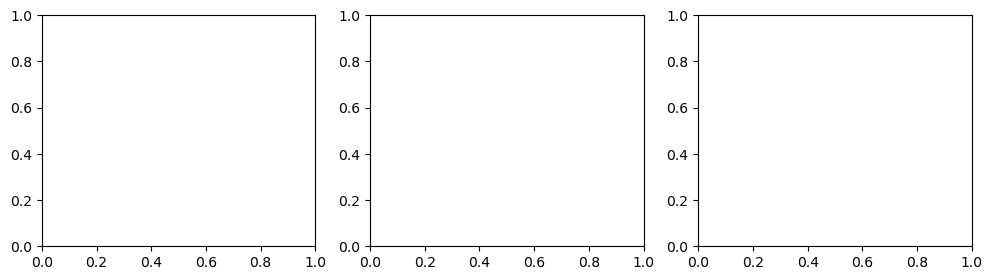

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fg, ax = plt.subplots(1, 3, figsize=(12,3))
sns.scatterplot(projections_wo_tbi_pca_00, x='pca0', y='pca1', hue='dataset_name', ax=ax[0])
ax[0].set_title('PCA - epoch:0 - SSL trained wo TBI')
sns.despine()
sns.scatterplot(projections_wo_tbi_pca_50, x='pca0', y='pca1', hue='dataset_name', ax=ax[1])
ax[1].set_title('PCA - epoch:50 - SSL trained wo TBI')
sns.despine()
sns.scatterplot(projections_wo_tbi_pca_100, x='pca0', y='pca1', hue='dataset_name', ax=ax[2])
ax[2].set_title('PCA - epoch:100 - SSL trained wo TBI')
sns.despine()
plt.show()